<a href="https://colab.research.google.com/github/sebastiangomba/Sebastian.github.io/blob/main/Copia_de_Interfaz_de_Modelo_de_predicci%C3%B3n_de_Proyecto_Analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
pip install gradio

In [38]:
pip install flask

In [39]:
import pandas as pd
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')
import pylab
!pip install pingouin
import pingouin as pg
sns.set()
# esto toca usarlo cuando usamos logistica
# Apply a fix  to the statsmodels library
from scipy import stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
file_name='/content/drive/MyDrive/Colab Notebooks/Saber_11__2019-2.csv'
na_values=['?']
df = pd.read_csv(file_name,encoding = 'unicode_escape',na_values = na_values)

<ipython-input-40-e56f7f92338b>:3: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name,encoding = 'unicode_escape',na_values = na_values)


In [41]:
df.head()

,ï»¿ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


In [42]:
modas = df.mode().iloc[0]
# Llenar valores faltantes en todas las columnas con sus respectivas modas
df.fillna(modas, inplace=True)

In [43]:
df.isnull().sum()

ï»¿ESTU_TIPODOCUMENTO       0
ESTU_NACIONALIDAD           0
ESTU_GENERO                 0
ESTU_FECHANACIMIENTO        0
PERIODO                     0
                           ..
ESTU_INSE_INDIVIDUAL        0
ESTU_NSE_INDIVIDUAL         0
ESTU_NSE_ESTABLECIMIENTO    0
ESTU_ESTADOINVESTIGACION    0
ESTU_GENERACION-E           0
Length: 82, dtype: int64

In [44]:
#Eliminamos columnas que consideramos innecesarias para nuestro trabajo
df.drop(['COLE_CALENDARIO','COLE_COD_DANE_ESTABLECIMIENTO','ESTU_COD_RESIDE_MCPIO','COLE_CODIGO_ICFES','COLE_COD_DANE_SEDE','COLE_SEDE_PRINCIPAL','COLE_COD_MCPIO_UBICACION','COLE_COD_DEPTO_UBICACION','ESTU_COD_MCPIO_PRESENTACION','ESTU_COD_DEPTO_PRESENTACION'], axis=1)


,ï»¿ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,CC,COLOMBIA,M,02/25/1999 12:00:00 AM,20194,SB11201940195862,ESTUDIANTE,No,COLOMBIA,-,...,58.0,79,A2,360,99,47.5807720132296,2.0,2.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546208,TI,COLOMBIA,M,10/14/2002 12:00:00 AM,20194,SB11201940253002,ESTUDIANTE,No,COLOMBIA,-,...,74.0,97,B1,360,99,57.406418472062,3.0,4.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546209,TI,COLOMBIA,M,11/22/2002 12:00:00 AM,20194,SB11201940364767,ESTUDIANTE,No,COLOMBIA,-,...,72.0,96,B1,377,100,71.2254308010465,4.0,3.0,PUBLICAR,GENERACION E - EXCELENCIA DEPARTAMENTAL
546210,TI,COLOMBIA,M,11/10/2002 12:00:00 AM,20194,SB11201940210026,ESTUDIANTE,No,COLOMBIA,-,...,46.0,45,A-,278,73,38.1334451267846,1.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


In [45]:
modas = df.mode().iloc[0]
# Llenar valores faltantes en todas las columnas con sus respectivas modas
df.fillna(modas, inplace=True)

In [46]:
df.isnull().sum()

ï»¿ESTU_TIPODOCUMENTO       0
ESTU_NACIONALIDAD           0
ESTU_GENERO                 0
ESTU_FECHANACIMIENTO        0
PERIODO                     0
                           ..
ESTU_INSE_INDIVIDUAL        0
ESTU_NSE_INDIVIDUAL         0
ESTU_NSE_ESTABLECIMIENTO    0
ESTU_ESTADOINVESTIGACION    0
ESTU_GENERACION-E           0
Length: 82, dtype: int64

In [47]:
df['PERIODO'].value_counts()


20194    546212
Name: PERIODO, dtype: int64

In [48]:
df['ESTU_ESTUDIANTE'].value_counts()

ESTUDIANTE    546212
Name: ESTU_ESTUDIANTE, dtype: int64

In [49]:
df['ESTU_PAIS_RESIDE'].value_counts()


COLOMBIA                   544918
VENEZUELA                    1109
ESTADOS UNIDOS                 52
ESPAÃA                        33
ECUADOR                        26
PERÃ                           7
CUBA                            6
MÃXICO                         6
BRASIL                          5
ITALIA                          5
BOLIVIA                         5
COSTA RICA                      4
ARGENTINA                       4
FRANCIA                         3
COMORAS                         3
CHILE                           3
EL SALVADOR                     3
PAÃSES BAJOS - HOLANDA         2
CHINA                           2
REPÃBLICA DOMINICANA           2
COREA DEL NORTE                 2
BÃLGICA                        1
PANAMÃ                         1
CURAZAO                         1
AFGANISTÃN                     1
REINO UNIDO                     1
DINAMARCA                       1
ARUBA                           1
ALEMANIA                        1
CROACIA       

In [50]:
df['ESTU_ETNIA'] = df['ESTU_ETNIA'].replace("-", "Ninguno")
df['ESTU_TIENEETNIA'] = df['ESTU_TIENEETNIA'].replace("-", "No")

In [51]:
df.loc[df['ESTU_ETNIA'] != "Ninguno", 'ESTU_TIENEETNIA'] = "Si"
df.loc[df['ESTU_ETNIA'] == "Ninguno", 'ESTU_TIENEETNIA'] = "No"


In [52]:
mapeo = {'Si': 1, 'No': 0}

# Aplicar el mapeo a la columna 'Respuestas' y almacenar el resultado en una nueva columna 'Resultado'
df['ESTU_ETNIA'] = df['ESTU_ETNIA'].map(mapeo)

In [53]:
mapeo = {'GENERACION E - GRATUIDAD': 0, 'GENERACION E - EXCELENCIA DEPARTAMENTAL':1,'GENERACION E - EXCELENCIA NACIONAL':1, 'NO': 0}

# Aplicar el mapeo a la columna 'Respuestas' y almacenar el resultado en una nueva columna 'Resultado'
df['ESTU_GENERACION-E'] = df['ESTU_GENERACION-E'].map(mapeo)

In [54]:
mapeo = {'MÁS DE 100 LIBROS': 1, '26 A 100 LIBROS':1,'0 A 10 LIBROS':0,'11 A 25 LIBROS':1,'-':0 ,'NaN':0}

# Aplicar el mapeo a la columna 'Respuestas' y almacenar el resultado en una nueva columna 'Resultado'
df['FAMI_NUMLIBROS'] = df['FAMI_NUMLIBROS'].map(mapeo)

In [55]:
mapeo = {'Peor':0,'Mejor':1,'Igual':0}

# Aplicar el mapeo a la columna 'Respuestas' y almacenar el resultado en una nueva columna 'Resultado'
df['FAMI_SITUACIONECONOMICA'] = df['FAMI_SITUACIONECONOMICA'].map(mapeo)

In [56]:
mapeo = {'URBANO': 1, 'RURAL':0,'NaN':0}

# Aplicar el mapeo a la columna 'Respuestas' y almacenar el resultado en una nueva columna 'Resultado'
df['COLE_AREA_UBICACION'] = df['COLE_AREA_UBICACION'].map(mapeo)

In [57]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import statsmodels.api as sma

plt.style.use('ggplot')
df = df.rename(columns={'ESTU_GENERACION-E': 'GENERACION'})


## SUBDIVISON DE DATOS

In [58]:
from sklearn.decomposition import PCA

In [59]:
# importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

from collections import Counter
#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
# rechadazo = 0
LABELS = ["No Aplica beca","Aplica beca"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))
%matplotlib inline

In [60]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test,pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    metricas = classification_report(y_test, pred_y)
    print(classification_report(y_test, pred_y))


In [61]:
modas = df.mode().iloc[0]
# Llenar valores faltantes en todas las columnas con sus respectivas modas
df.fillna(modas, inplace=True)

In [62]:
y = df['GENERACION']
X=df[['PUNT_GLOBAL','FAMI_NUMLIBROS','FAMI_SITUACIONECONOMICA','COLE_AREA_UBICACION']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

## Balanceo

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

## Estandarizacion

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

##Con Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
Tree = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
Tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0)

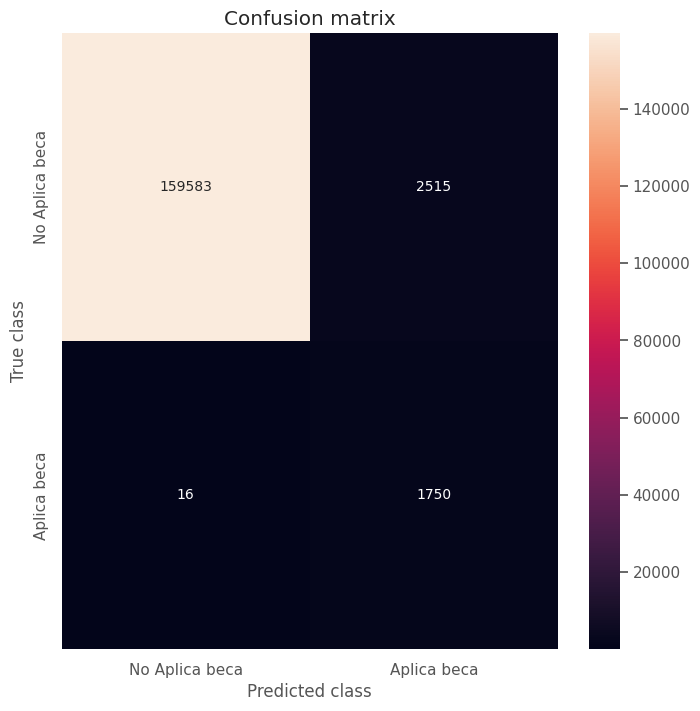

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    162098
           1       0.41      0.99      0.58      1766

    accuracy                           0.98    163864
   macro avg       0.71      0.99      0.79    163864
weighted avg       0.99      0.98      0.99    163864



In [66]:
pred_y = Tree.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [67]:
data = {
    'PUNT_GLOBAL': [350],
    'FAMI_NUMLIBROS': [1],
    'FAMI_SITUACIONECONOMICA': [1],
    'COLE_AREA_UBICACION':[1]

}
PREDECIR=pd.DataFrame(data)
PREDECIR
PRUEBA=Tree.predict(PREDECIR)
PRUEBA

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BalancedBaggingClassifier was fitted without feature names
  warnings.warn(


array([1])

In [70]:
def predict(punt_global, fami_numlibros, fami_situacioneconomica, cole_area_ubicacion, perform_prediction):

    if punt_global <=250:
      punt_global=2
    elif punt_global>=251:
      punt_global=3
    else: punt_global=punt_global
    if fami_numlibros >=10:
      fami_numlibros=1
    else:
      fami_numlibros=0

    if fami_situacioneconomica >=3:
      fami_situacioneconomica=1
    else:
      fami_situacioneconomica=0
    if cole_area_ubicacion=="Rural":
      cole_area_ubicacion=0
    else:
      cole_area_ubicacion=1

    if perform_prediction:
        data = {
            'PUNT_GLOBAL': [punt_global],
            'FAMI_NUMLIBROS': [fami_numlibros],
            'FAMI_SITUACIONECONOMICA': [fami_situacioneconomica],
            'COLE_AREA_UBICACION': [cole_area_ubicacion]
        }
        df = pd.DataFrame(data)
        prediction = Tree.predict(df)
        if prediction[0]==1:
          return "¡Puedes aplicar a una Beca !"
        else:
          return "Lo sentimos, no cumples con los requisitos"
          # Asegúrate de que Tree esté definido y sea tu modelo
         # Suponiendo que el modelo devuelve una lista, tomamos el primer elemento
    else:
        return "Marca la casilla para realizar la predicción"

recomendaciones_texto = """
<b>Recomendaciones:</b>
<ul>
    <li>Ingresa los valores adecuados para cada variable.</li>
    <li>Marca la casilla para realizar la predicción.</li>
</ul>
"""

# Crear la interfaz en Gradio
iface = gr.Interface(
    fn=predict,  # La función de predicción
    inputs=[
        (gr.Number(label='Puntaje global obtenido')),
        gr.Number(label='Número de libros que lee al año (Aproximandamente)'),
        gr.Number(label='Estrato socioeconómico'),
        gr.Dropdown(["Rural", "Urbano"], label="Colegio Rural o Urbano"),
        gr.Checkbox(label="Realizar Predicción"),


        #gr.Button
    ],
    outputs=gr.Textbox(),  # El resultado se mostrará en un cuadro de texto
    live=False # Actualizar en tiempo real mientras se ingresan los datos
)

# Lanzar la interfaz
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0655ef3abc16538448.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
